Importing all the necessary libraries

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Reading the data file 

In [201]:
df = pd.read_csv("DistributorData.csv")

Feature selection

In [202]:
train = df[["latitude","longitude"]]

Finding optimal number of clusters

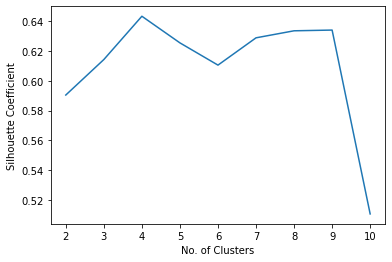

In [203]:
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters = n_cluster).fit(train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(train, label)
    #print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

Grouping the datapoints in four clusters 

In [204]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train)

Data prep

In [205]:
df["clusters"] = (kmeans.labels_)
df_centers = pd.DataFrame(kmeans.cluster_centers_,columns=[ "lat", "long"])
df_centers

,lat,long
0,40.945422,-73.719966
1,42.720299,-78.394997
2,42.805090,-75.901622
3,43.436771,-73.734623


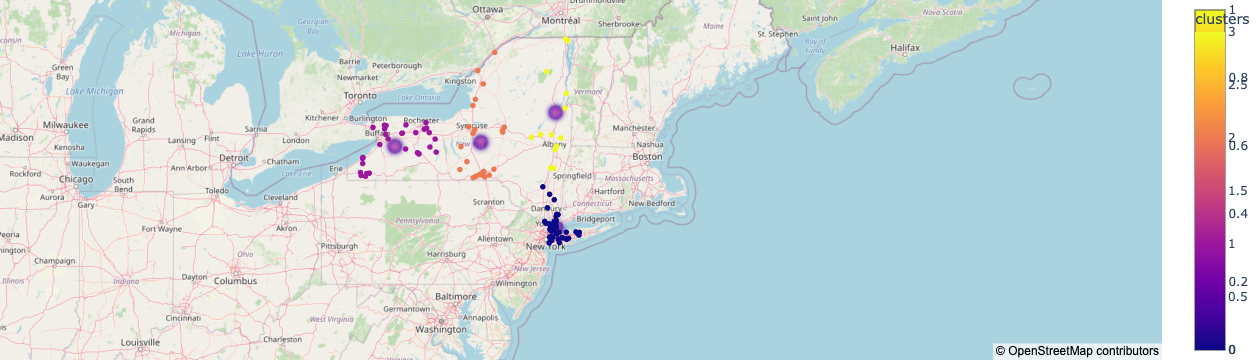

In [206]:
import plotly.express as px


fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",color="clusters" ,hover_name="city",
                         zoom=4.6, height=300,center={"lon": -73,"lat":42},color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.add_densitymapbox(lat=df_center["lat"],lon=df_center["long"],radius=12,opacity=0.70)
fig.show()